## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
import os
import keras
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
#load datasets
train, test = keras.datasets.cifar10.load_data()

In [15]:
## pre-processing (minmax x )
def preproc_x(x, flatten=True):
    x = (x - x.mean())/(x.max()-x.min())
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [16]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [17]:
#original network
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [18]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 136us/step - loss: 1.6423 - accuracy: 0.4190 - val_loss: 1.5001 - val_accuracy: 0.4711
Epoch 2/100
50000/50000 [==============================] - 7s 133us/step - loss: 1.4180 - accuracy: 0.5033 - val_loss: 1.4448 - val_accuracy: 0.4955
Epoch 3/100
50000/50000 [==============================] - 7s 138us/step - loss: 1.2946 - accuracy: 0.5450 - val_loss: 1.3837 - val_accuracy: 0.5159
Epoch 4/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.1973 - accuracy: 0.5810 - val_loss: 1.3639 - val_accuracy: 0.5255
Epoch 5/100
50000/50000 [==============================] - 7s 138us/step - loss: 1.1053 - accuracy: 0.6141 - val_loss: 1.3576 - val_accuracy: 0.5217
Epoch 6/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.0259 - accuracy: 0.6400 - val_loss: 1.3686 - val_accuracy: 0.5280
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 7s 140us/step - loss: 0.0756 - accuracy: 0.9746 - val_loss: 4.4785 - val_accuracy: 0.5306
Epoch 56/100
50000/50000 [==============================] - 7s 140us/step - loss: 0.0753 - accuracy: 0.9746 - val_loss: 4.5257 - val_accuracy: 0.5305
Epoch 57/100
50000/50000 [==============================] - 7s 140us/step - loss: 0.0853 - accuracy: 0.9724 - val_loss: 4.6175 - val_accuracy: 0.5257
Epoch 58/100
50000/50000 [==============================] - 7s 140us/step - loss: 0.1054 - accuracy: 0.9668 - val_loss: 4.5009 - val_accuracy: 0.5340
Epoch 59/100
50000/50000 [==============================] - 7s 140us/step - loss: 0.1130 - accuracy: 0.9639 - val_loss: 4.4849 - val_accuracy: 0.5307
Epoch 60/100
50000/50000 [==============================] - 7s 140us/step - loss: 0.0667 - accuracy: 0.9775 - val_loss: 4.6517 - val_accuracy: 0.5381
Epoch 61/100
50000/50000 [==============================] - 7s 140us/step - loss: 0.0668 - accuracy: 0.9784 - val

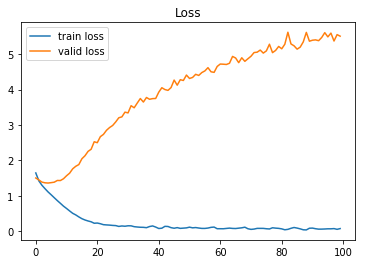

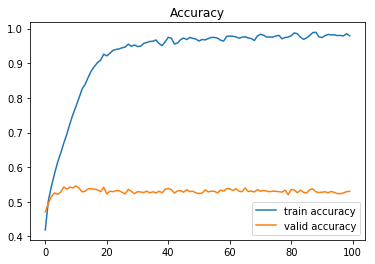

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [21]:
#add more hidden layers into network
def build_mlp2(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 64, 32, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [22]:
model2 = build_mlp2(input_shape=x_train.shape[1:])
model2.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                4160      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 32)                2080

In [23]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model2.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 147us/step - loss: 1.8941 - accuracy: 0.3311 - val_loss: 1.6649 - val_accuracy: 0.4211
Epoch 2/100
50000/50000 [==============================] - 7s 147us/step - loss: 1.5636 - accuracy: 0.4504 - val_loss: 1.5187 - val_accuracy: 0.4684
Epoch 3/100
50000/50000 [==============================] - 7s 149us/step - loss: 1.4240 - accuracy: 0.5010 - val_loss: 1.4533 - val_accuracy: 0.4887
Epoch 4/100
50000/50000 [==============================] - 7s 144us/step - loss: 1.3166 - accuracy: 0.5390 - val_loss: 1.3968 - val_accuracy: 0.5123
Epoch 5/100
50000/50000 [==============================] - 7s 144us/step - loss: 1.2330 - accuracy: 0.5689 - val_loss: 1.3771 - val_accuracy: 0.5230
Epoch 6/100
50000/50000 [==============================] - 7s 146us/step - loss: 1.1550 - accuracy: 0.5966 - val_loss: 1.3638 - val_accuracy: 0.5325
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 7s 145us/step - loss: 0.1094 - accuracy: 0.9632 - val_loss: 3.6464 - val_accuracy: 0.5304
Epoch 56/100
50000/50000 [==============================] - 7s 145us/step - loss: 0.1070 - accuracy: 0.9654 - val_loss: 3.4538 - val_accuracy: 0.5369
Epoch 57/100
50000/50000 [==============================] - 7s 144us/step - loss: 0.0879 - accuracy: 0.9702 - val_loss: 3.5719 - val_accuracy: 0.5346
Epoch 58/100
50000/50000 [==============================] - 7s 144us/step - loss: 0.0956 - accuracy: 0.9687 - val_loss: 3.6555 - val_accuracy: 0.5404
Epoch 59/100
50000/50000 [==============================] - 7s 144us/step - loss: 0.0987 - accuracy: 0.9675 - val_loss: 3.4925 - val_accuracy: 0.5290
Epoch 60/100
50000/50000 [==============================] - 7s 144us/step - loss: 0.1012 - accuracy: 0.9666 - val_loss: 3.5179 - val_accuracy: 0.5289
Epoch 61/100
50000/50000 [==============================] - 8s 152us/step - loss: 0.0929 - accuracy: 0.9697 - val

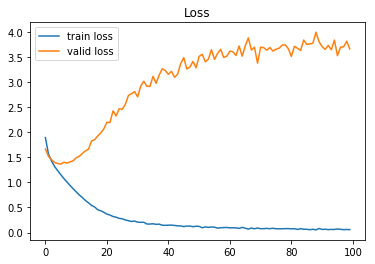

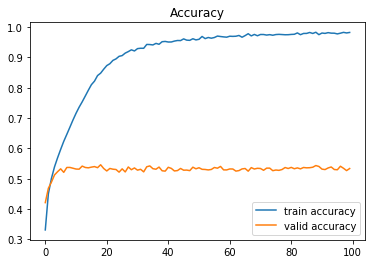

In [24]:
train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["accuracy"]
valid_acc = model2.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()